In [2]:
using Crystalline, MPBUtils, SymmetryBases, PyPlot, LinearAlgebra
using MPBUtils: parse_sgnum, parse_dim
using MPBUtils: BandSummary

In [9]:
num_groupings = 40

te_stable_stats = []
tm_stable_stats = []

te_fragile_stats = []
tm_fragile_stats = []

te_cum_fragile_stats = []
tm_cum_fragile_stats = []

for (sg_idx, sg) in enumerate((2, 6, (9:17)...))
    println(sg); flush(stdout)
    brs = bandreps(sg, 2)
    for polarization in ("te", "tm")
        
        stable_sg_stats = zeros(num_groupings)
        fragile_sg_stats = zeros(num_groupings)
        cum_fragile_sg_stats = zeros(num_groupings)

        for id in 1:100

            symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/output")
            lgirsd = pick_lgirreps(lgd)
            fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
            band_groupings = analyze_symmetry_data(symeigsd, lgirsd, brs)
            
            cumulative_band_groupings = Vector{MPBUtils.BandSummary}()
            
            for i in 1:length(band_groupings)
                push!(cumulative_band_groupings, sum(band_groupings[1:i]))
            end
                
            topologies = [band_grouping.topology for band_grouping in band_groupings]
            cum_topologies = [band_grouping.topology for band_grouping in cumulative_band_groupings]

            trivials = isequal.(TRIVIAL, topologies)
            fragiles = isequal.(FRAGILE, topologies)
            cum_fragiles = isequal.(FRAGILE, cum_topologies)

            stables = isequal.(NONTRIVIAL, topologies)
            
            trivials = Int.([trivials..., zeros(Int, 40-length(trivials))...])
            fragiles = Int.([fragiles..., zeros(Int, 40-length(fragiles))...])
            cum_fragiles = Int.([cum_fragiles..., zeros(Int, 40-length(cum_fragiles))...])

            stables = Int.([stables..., zeros(Int, 40-length(stables))...])
            
            stable_sg_stats .+= stables
            fragile_sg_stats .+= fragiles
            cum_fragile_sg_stats .+= cum_fragiles

        end
        if polarization == "te"
            push!(te_stable_stats, stable_sg_stats)
            push!(te_fragile_stats, fragile_sg_stats)
            push!(te_cum_fragile_stats, cum_fragile_sg_stats)
        elseif polarization == "tm"
            push!(tm_stable_stats, stable_sg_stats)
            push!(tm_fragile_stats, fragile_sg_stats)
            push!(tm_cum_fragile_stats, cum_fragile_sg_stats)            
        end
    end
end

2
6
9
10
11
12
13
14
15
16
17


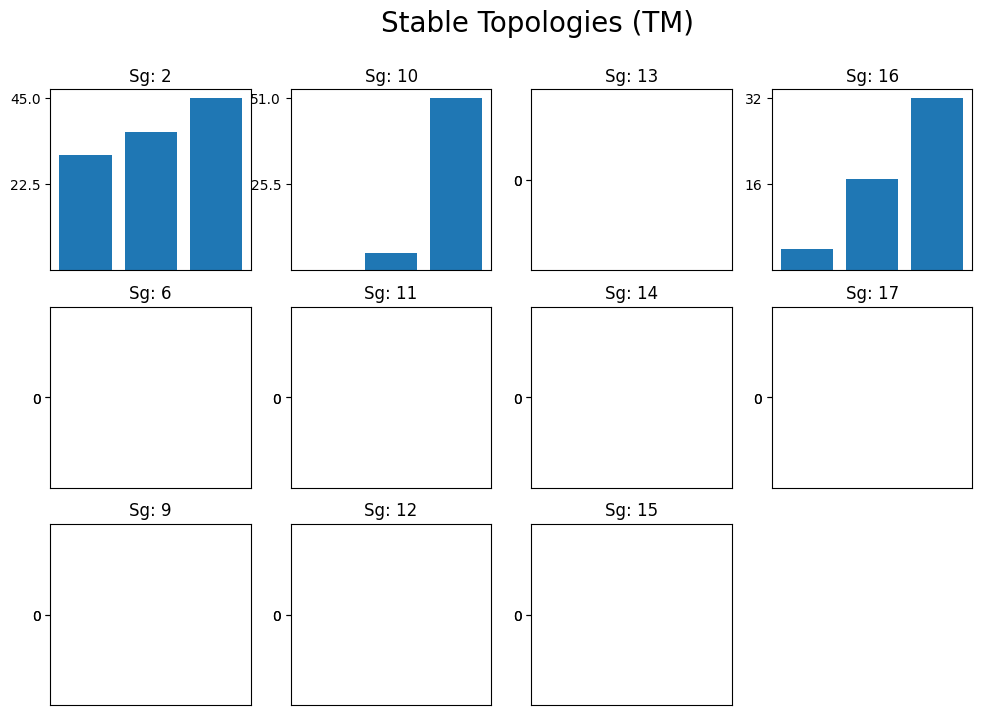

In [10]:
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Stable Topologies (TM)", fontsize=20, x=0.45)
for i in 1:15
    try
        axes[i].bar(1:3, tm_stable_stats[i][1:3])
        top_tick = maximum(tm_stable_stats[i][1:3])

        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end


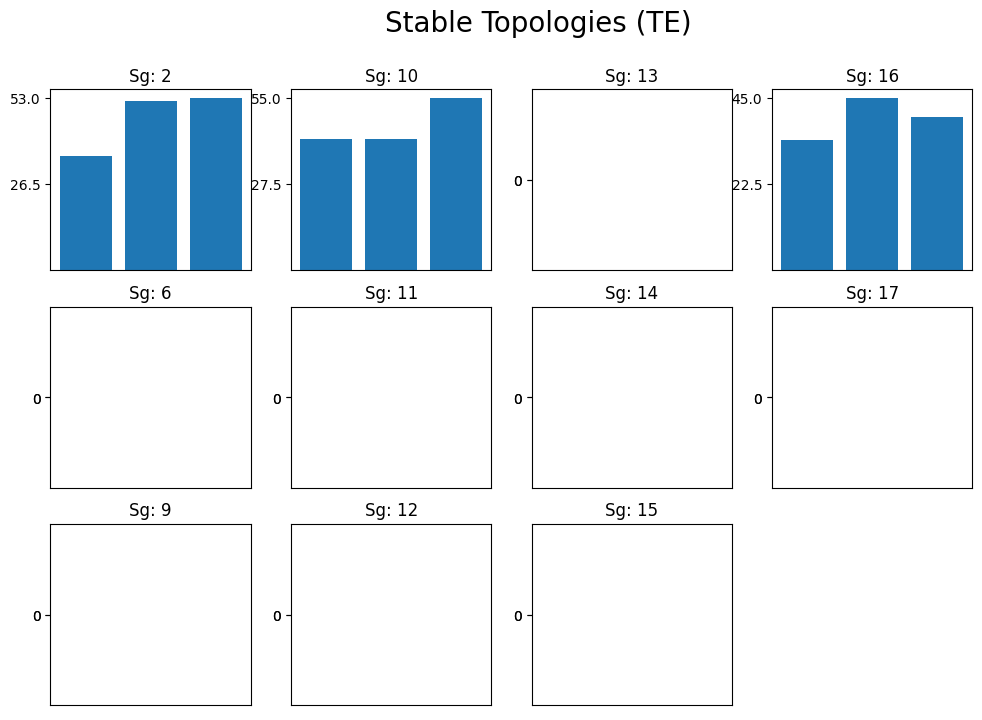

In [11]:
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Stable Topologies (TE)", fontsize=20, x=0.45)
for i in 1:15
    try
        axes[i].bar(1:3, te_stable_stats[i][1:3])
        top_tick = maximum(te_stable_stats[i][1:3])
        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end


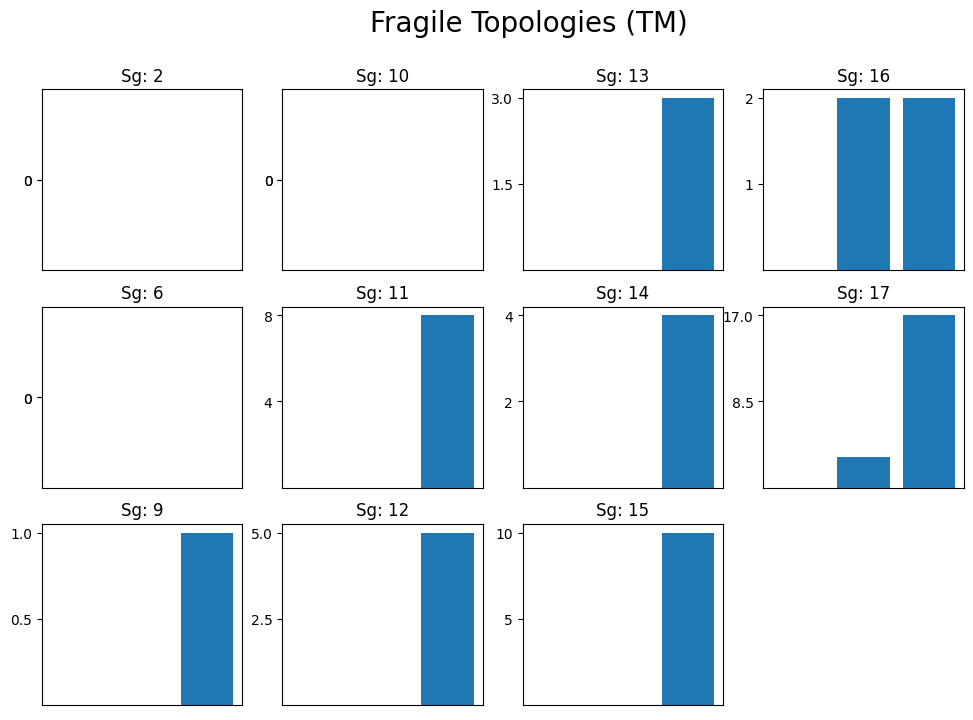

In [12]:
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Fragile Topologies (TM)", fontsize=20, x=0.45)
for i in 1:15
    try
        top_tick = maximum(tm_fragile_stats[i][1:3])

        axes[i].bar(1:3, tm_fragile_stats[i][1:3])
        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end


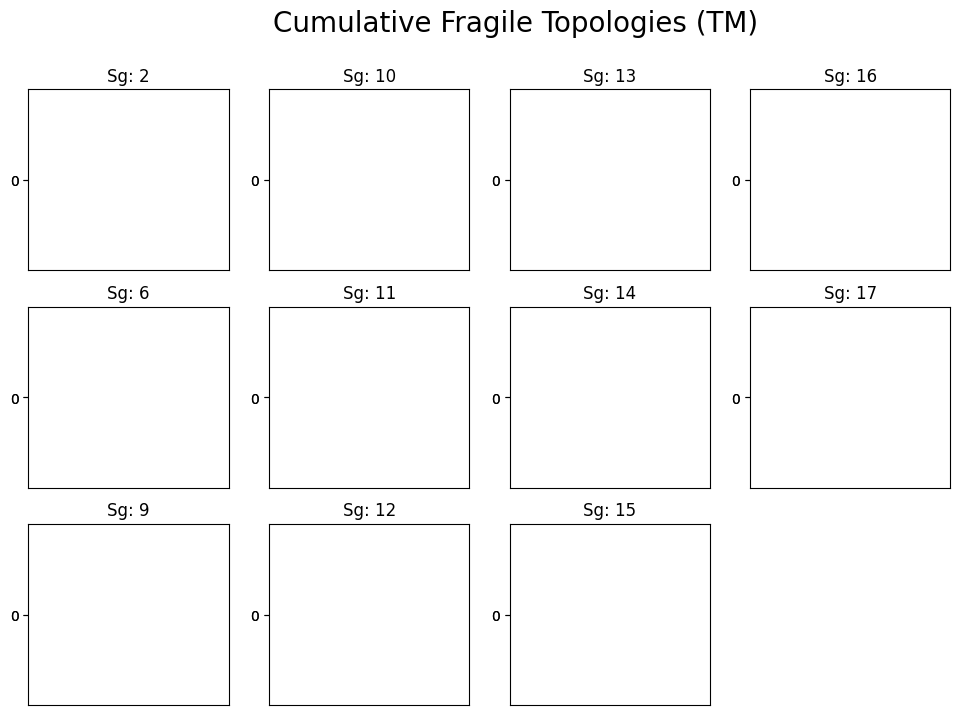

In [7]:
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Cumulative Fragile Topologies (TM)", fontsize=20, x=0.45)
for i in 1:15
    try
        top_tick = maximum(tm_cum_fragile_stats[i][1:3])

    
        axes[i].bar(1:3, tm_cum_fragile_stats[i][1:3])
        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end


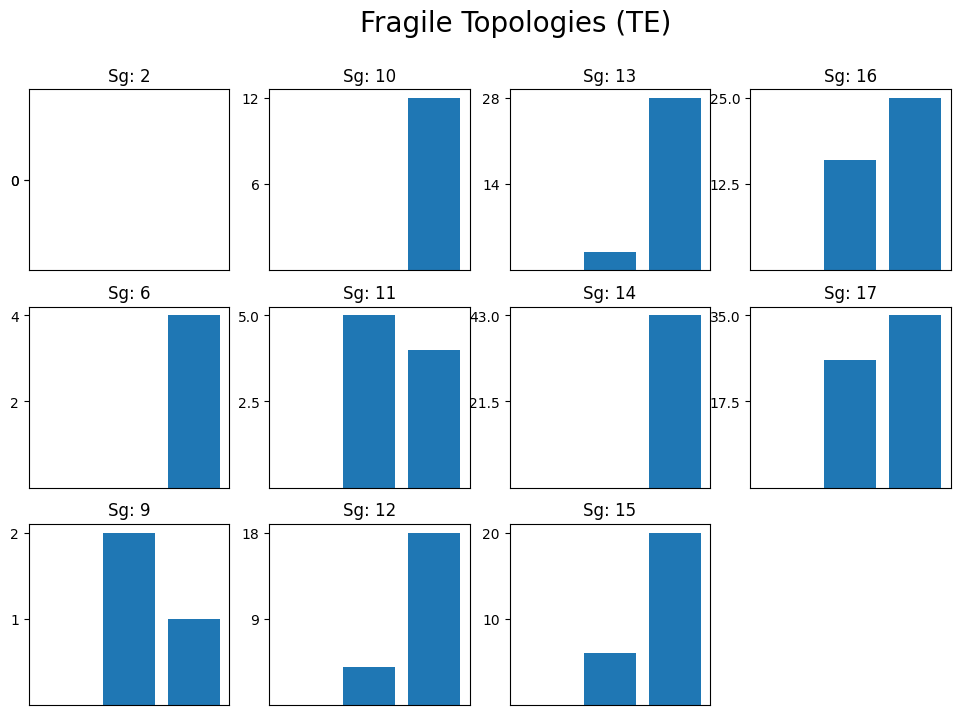

In [136]:
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Fragile Topologies (TE)", fontsize=20, x=0.45)
for i in 1:15
    try
        top_tick = maximum(te_fragile_stats[i][1:3])

        axes[i].bar(1:3, te_fragile_stats[i][1:3])
        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end



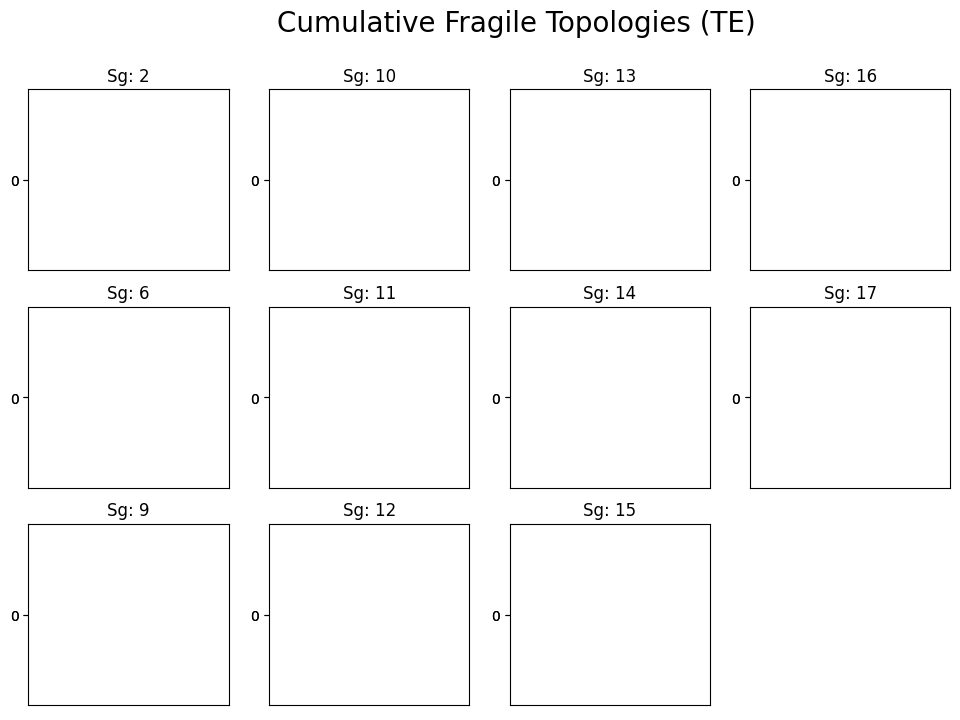

In [137]:
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Cumulative Fragile Topologies (TE)", fontsize=20, x=0.45)
for i in 1:15
    try
        top_tick = maximum(te_cum_fragile_stats[i][1:3])

        axes[i].bar(1:3, te_cum_fragile_stats[i][1:3])
        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end

